# [OSMsc](https://github.com/ruirzma/osmsc) fusing multiple data sources

Author: [Rui Ma](https://github.com/ruirzma)

The main content of this notebook is data fusion.

## 1. Building height

In [1]:
import osmsc as oc
import osmnx as ox
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import osmsc.fusion as fusion

OSMsc has been successfully imported!!!


In [2]:
cityName = "Portland"
bbox_Portland = (45.5124, -122.6610,45.5231, -122.6455)

In [3]:
BG = oc.building_group(bbox= bbox_Portland )
building_gdf = BG.get_gdf(tags=True, building_levels=False)
building_gdf_prj = ox.project_gdf(building_gdf)

In [4]:
json_path = "data/_Case_Portland.geojson"
externalBuilding_gdf = gpd.GeoDataFrame.from_file(json_path)
externalBuilding_gdf.crs = "epsg:4326"
externalBuilding_gdf.head(2)

,OBJECTID,BLDG_ID,STATE_ID,BLDG_NUMB,BLDG_STAT,BLDG_NAME,BLDG_ADDR,BLDG_TYPE,BLDG_USE,BLDG_SQFT,...,ORIENT,VOLUME,Shape_Leng,Shape_Area,PROPKEY,EDIT_STAT,DATA_SOURC,RETIRED_BY,RETIRED_DA,geometry
0,233,1S1E02AB-10600-B1,1S1E02AB 10600,1.0,EXISTING,713-717 SE 17TH AVE,713-717 SE 17TH AVE,Duplex,Multi Family Residential,4055.0,...,NaN,38883.0,64.932421,255.380213,654308,CURRENT,PDX,None,None,"MULTIPOLYGON (((-122.64889 45.51765, -122.6487..."
1,254,1S1E02AC-17500-B1,1S1E02AC 17500,1.0,EXISTING,1413 SE 15TH AVE,1413 SE 15TH AVE,House,Single Family Residential,2834.0,...,NaN,42284.0,82.097976,331.031219,656977,CURRENT,PDX,None,None,"MULTIPOLYGON (((-122.65095 45.51262, -122.6509..."


In [5]:
externalBuilding_gdf_prj = ox.project_gdf(externalBuilding_gdf)
building_gdf_prj = fusion.add_building_height(building_gdf_prj, externalBuilding_gdf_prj, extColName ="AVG_HEIGHT" )

Please wait a few minutes


In [6]:
building_gdf_prj.head()

,osmid,geometry,tags,osmscID,Building_area,Building_perimeter,Building_height
0,34198756,"POLYGON ((526674.773 5040294.051, 526693.800 5...","{'addr:city': 'Portland', 'addr:housenumber': ...",Building_34198756,1076.706250,137.387438,32.000000
1,39275977,"POLYGON ((527061.897 5040774.526, 527069.269 5...","{'addr:city': 'Portland', 'addr:housenumber': ...",Building_39275977,121.922020,47.819427,30.475447
2,39275978,"POLYGON ((527066.968 5040743.206, 527072.817 5...","{'addr:city': 'Portland', 'addr:housenumber': ...",Building_39275978,176.890280,72.144995,20.135500
3,39337798,"POLYGON ((527105.395 5040442.937, 527110.089 5...","{'addr:city': 'Portland', 'addr:housenumber': ...",Building_39337798,809.577681,149.199048,49.200199
4,39337799,"POLYGON ((527061.918 5040434.795, 527076.484 5...","{'addr:city': 'Portland', 'addr:housenumber': ...",Building_39337799,315.231554,71.594799,17.507538


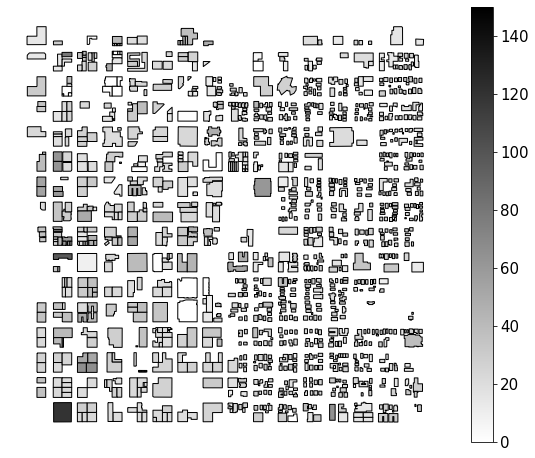

In [7]:
ax = building_gdf_prj.plot(figsize=(10,8), edgecolor='k',
                                 linewidth=1,
                                 column="Building_height",
                                 cmap='binary',legend= True,vmin=0, vmax=150)

fig = ax.figure
cb_ax = fig.axes[1] 
cb_ax.tick_params(labelsize=15,)

ax.set_axis_off()

# 2. Thematic information -- landuse

In [8]:
cityName = "Paris"
bbox_Paris = (48.8695, 2.3908, 48.8825, 2.4108)

In [9]:
UT = oc.urban_tile_group(bbox= bbox_Paris, trans_type= ['primary','secondary', 'tertiary','residential','motorway','motorway_link'])
urban_tile_gdf_prj = UT.get_gdf_prj()

In [10]:
json_path = "data/_Case_Paris_landuse.geojson"
Paris_landuse_gdf = gpd.GeoDataFrame.from_file(json_path)
Paris_landuse_gdf.crs = "epsg:3035" 
Paris_landuse_gdf = Paris_landuse_gdf.to_crs("epsg:4326") # lat lon
Paris_landuse_gdf_prj = ox.project_gdf(Paris_landuse_gdf)

In [11]:
Paris_landuse_gdf.head(3)

,COUNTRY,CITIES,FUA_OR_CIT,CODE2006,ITEM2006,PROD_DATE,Shape_Leng,Shape_Area,geometry
0,FR,Paris,FR001L1,14100,Green urban areas,2005,2539.507928,98621.845967,"MULTIPOLYGON (((2.42245 48.89055, 2.42270 48.8..."
1,FR,Paris,FR001L1,11100,Continuous urban fabric (S.L. : > 80%)\r\nCont...,2005,663.656377,25300.645187,"MULTIPOLYGON (((2.40393 48.88643, 2.40392 48.8..."
2,FR,Paris,FR001L1,14100,Green urban areas,2005,1018.601641,38547.287077,"MULTIPOLYGON (((2.41873 48.88924, 2.41885 48.8..."


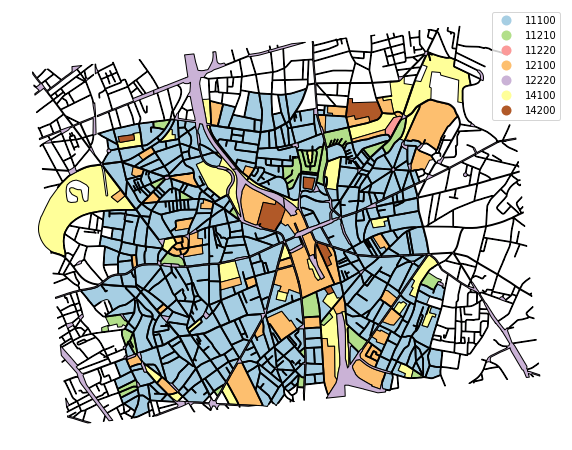

In [12]:
ax = Paris_landuse_gdf.plot(figsize=(10,10), edgecolor='k',linewidth=1,  column="CODE2006", cmap='Paired',legend=True)
ax.set_axis_off()

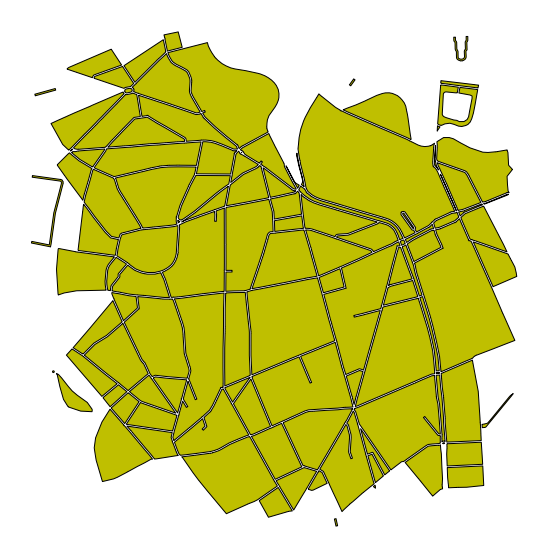

In [13]:
ax = urban_tile_gdf_prj.plot(figsize=(10,10), edgecolor='k',linewidth=1, facecolor = "y")
ax.set_axis_off()

In [14]:
urban_tile_gdf_prj.head(3)

,geometry,osmscID,UrbanTile_area,UrbanTile_perimeter
0,"POLYGON ((455319.368 5413938.058, 455319.574 5...",UrbanTile_0,14206.078301,550.042857
1,"POLYGON ((455464.009 5413939.332, 455464.775 5...",UrbanTile_1,28787.141232,654.760361
2,"POLYGON ((455682.607 5413930.147, 455688.462 5...",UrbanTile_2,51743.116104,1041.921144


In [15]:
intersection_area_gdf_prj = gpd.overlay(urban_tile_gdf_prj, Paris_landuse_gdf_prj, how ='intersection')
intersection_area_gdf_prj["intersection_area"] = intersection_area_gdf_prj["geometry"].area

In [16]:
intersection_area_gdf_prj.head(3)

,osmscID,UrbanTile_area,UrbanTile_perimeter,COUNTRY,CITIES,FUA_OR_CIT,CODE2006,ITEM2006,PROD_DATE,Shape_Leng,Shape_Area,geometry,intersection_area
0,UrbanTile_0,14206.078301,550.042857,FR,Paris,FR001L1,11100,Continuous urban fabric (S.L. : > 80%)\r\nCont...,2005,523.448766,13111.666988,"POLYGON ((455319.684 5413940.708, 455336.398 5...",12887.924633
1,UrbanTile_0,14206.078301,550.042857,FR,Paris,FR001L1,12220,Other roads and associated land,2005,29478.710431,101669.173832,"MULTIPOLYGON (((455319.368 5413938.058, 455319...",1318.153668
2,UrbanTile_1,28787.141232,654.760361,FR,Paris,FR001L1,12220,Other roads and associated land,2005,29478.710431,101669.173832,"MULTIPOLYGON (((455523.988 5413874.364, 455508...",328.036985


In [17]:
UrbanTile_with_landuse = gpd.sjoin(urban_tile_gdf_prj, intersection_area_gdf_prj, how="left", op="intersects")
UrbanTile_with_landuse["CODE2006"] = UrbanTile_with_landuse["CODE2006"].fillna("93000")
UrbanTile_with_landuse["area_weight"] = UrbanTile_with_landuse["intersection_area"]/UrbanTile_with_landuse["UrbanTile_area_left"]
UrbanTile_with_landuse["UrbanTile_centroid"] = UrbanTile_with_landuse["geometry"].centroid

In [18]:
UrbanTile_uni_geom = UrbanTile_with_landuse['geometry'].unique()  # Geopandas Series

In [19]:
# Only densign for EU Urban Atlas dataset

URBAN_ATLAS_code_color = { 11100:"maroon",                   
11210: "crimson",
11220: "tomato",
11230: "salmon",
11240: "pink",
11300: "sienna",
12100: "orchid",
12210: "lightgray",
12220: "darkgray",
12230: "dimgray",
12300: "lavender",
12400: "plum",
13100: "brown",
13300: "tan",
13400: "chocolate",
14100: "yellowgreen",
14200: "lightgreen",
20000: "ivory",
30000: "green",
50000: "turquoise",
91000: "white",
92000: "white",
93000: "whitesmoke"
}
# "unknown":"No date (not yet provided by landuse dateset)"

def pie_marker(xs, ys, ratios, sizes, colors):
    assert sum(ratios) <= 1, 'sum of ratios needs to be < 1'

    markers = []
    previous = 0
    # calculate the points of the pie pieces
    for color, ratio in zip(colors, ratios):
        this = 2 * np.pi * ratio + previous
        x  = [0] + np.cos(np.linspace(previous, this, 20)).tolist() + [0] # 20 份
        y  = [0] + np.sin(np.linspace(previous, this, 20)).tolist() + [0]
        xy = np.column_stack([x, y])
        previous = this
        markers.append({'marker':xy, 's':np.abs(xy).max()**2*np.array(sizes), 'facecolor':color, "edgecolor":'k'})

    # scatter each of the pie pieces to create pies
    for marker in markers:
        ax.scatter(xs, ys, **marker)
        

def pie_parameter(block_index):
    sub_block_with_landuse = UrbanTile_with_landuse[UrbanTile_with_landuse['geometry'] == UrbanTile_uni_geom[block_index]]
    
    # area_weight too small 
    sub_block_with_landuse = sub_block_with_landuse[sub_block_with_landuse["area_weight"] > 0.001]

    # merge same color
    sub_block_with_landuse = sub_block_with_landuse.groupby("CODE2006").sum()
    # save index
    sub_block_with_landuse["CODE2006"] = sub_block_with_landuse.index 

    # UrbanTile without landuse info
    unknown_area_weight = round ( (1- sum(round(sub_block_with_landuse["area_weight"],2))),2) 

    x_ = UrbanTile_uni_geom[block_index].centroid.x
    y_ = UrbanTile_uni_geom[block_index].centroid.y

    if unknown_area_weight > 0:
        # unknown_area exists
        ratios_ = list(round(sub_block_with_landuse["area_weight"],2)) + [unknown_area_weight]
        URBAN_ATLAS_code = list(sub_block_with_landuse["CODE2006"]) + ["93000"]
    elif unknown_area_weight == 0:
        # unknown_area does not exist
        ratios_ = list(round(sub_block_with_landuse["area_weight"],2))
        URBAN_ATLAS_code = list(sub_block_with_landuse["CODE2006"]) 
    else:
        # unknown_area_weight < 0
        ratios_ = [1.0]
        URBAN_ATLAS_code = ["93000"]

    colors_ = [URBAN_ATLAS_code_color[int(i)] for i in URBAN_ATLAS_code]
    
    
    return x_, y_, ratios_, colors_

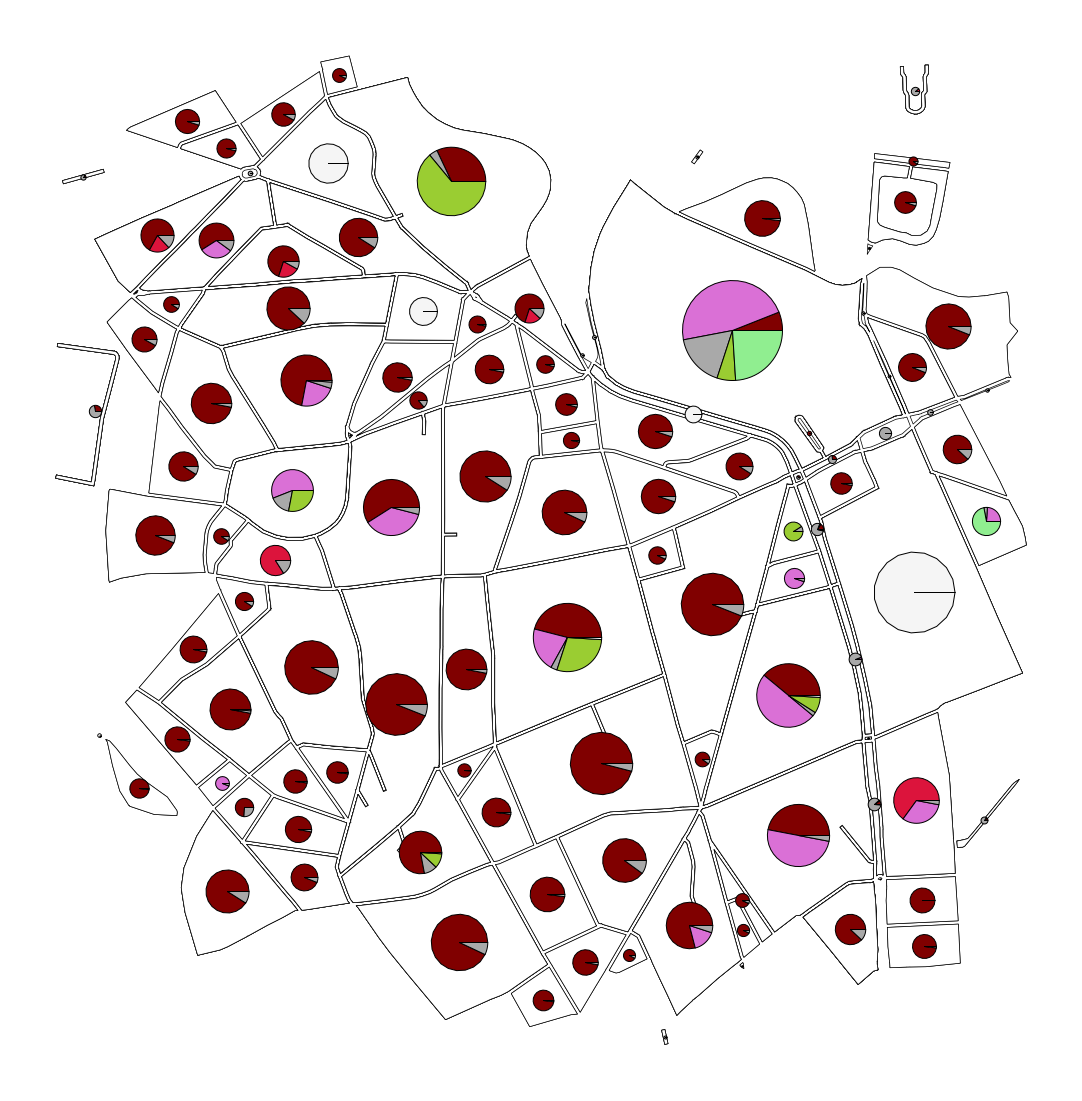

In [20]:
fig, ax = plt.subplots(figsize=(25,20))
UrbanTile_with_landuse.plot(ax = ax, edgecolor='k',linewidth=0.7, facecolor = "white")

for block_index in range(len(UrbanTile_uni_geom)):
    
    max_geom_area = max([UrbanTile_uni_geom[block_index].area for block_index in range(len(UrbanTile_uni_geom))])
    
    x_, y_, ratios_, colors_ = pie_parameter(block_index)
    pie_marker(xs = x_ ,
                  ys = y_ ,
                  ratios = ratios_,
                  sizes=[10000*(UrbanTile_uni_geom[block_index].area/max_geom_area)],
                  colors= colors_)


ax.set_axis_off()

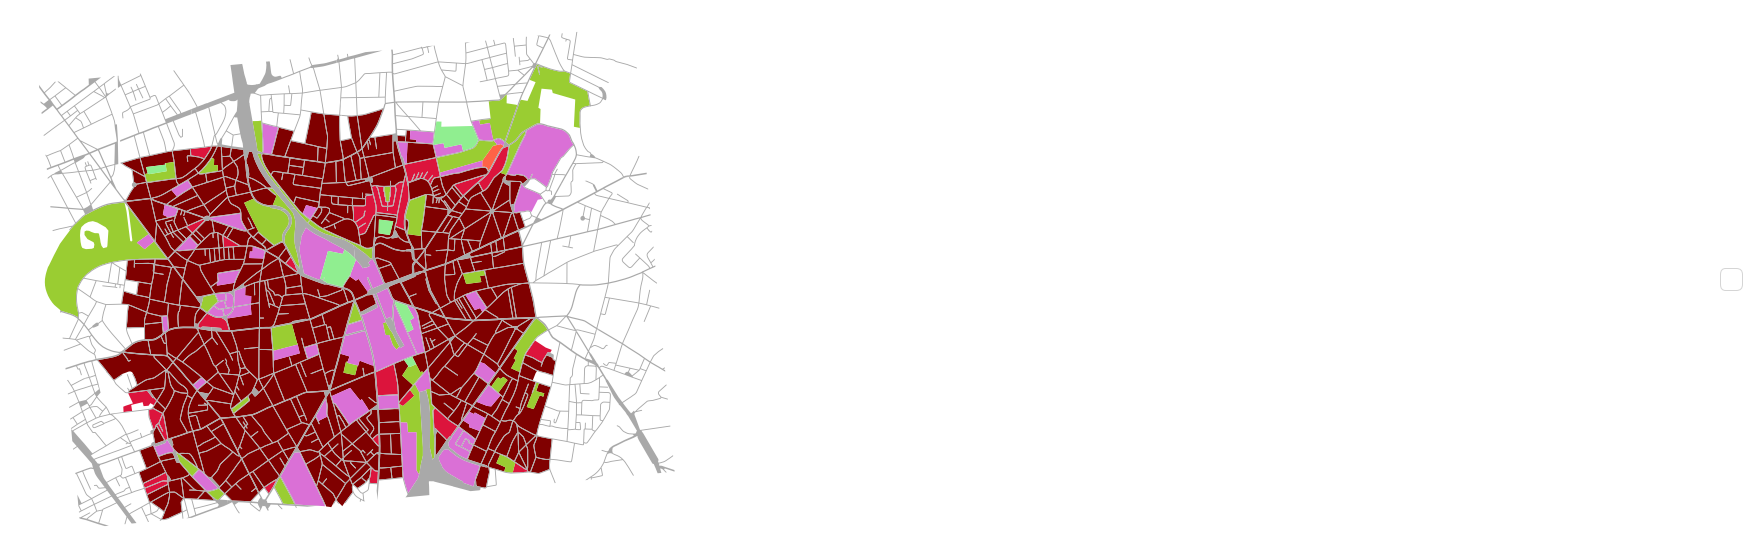

In [22]:
URBAN_ATLAS_Landuse_ITEM2006 = { 11100:"Continuous urban fabric",                   
11210: "Discontinuous dense urban fabric",
11220: "Discontinuous medium density urban fabric",
11230: "Discontinuous low density urban fabric",
11240: "Discontinuous very low density urban fabric",
11300: "Isolated structures",
12100: "Industrial, commercial, public, military and private units",
                                
12210: "Fast transit roads and associated land",
12220: "Other roads and associated land",
12230: "Railways and associated land",
12300: "Port areas",
12400: "Airports",
13100: "Mineral extraction and dump sites",
13300: "Construction sites",
13400: "Land without current use",
                                
14100: "Green urban areas",
14200: "Sports and leisure facilities",
20000: "Agricultural, semi-natural areas, wetlands",
30000: "Forests",
50000: "Water",
91000: "No data (Clouds and shadows)",
92000: "No data (Missing imagery)",
93000: "No date (Not yet provided by landuse dateset)"                      
}

URBAN_ATLAS_ITEM_color = { "Continuous urban fabric":"maroon",                   
"Discontinuous dense urban fabric": "crimson",
"Discontinuous medium density urban fabric": "tomato",
"Discontinuous low density urban fabric": "salmon",
"Discontinuous very low density urban fabric": "pink",
"Isolated structures": "sienna",
"Industrial, commercial, public, military and private units": "orchid",
"Fast transit roads and associated land": "lightgray",
"Other roads and associated land": "darkgray",
"Railways and associated land": "dimgray",
"Port areas": "lavender",
"Airports": "plum",
"Mineral extraction and dump sites": "brown",
"Construction sites": "tan",
"Land without current use": "chocolate",
"Green urban areas": "yellowgreen",
"Sports and leisure facilities": "lightgreen",
"Agricultural, semi-natural areas, wetlands": "ivory",
"Forests": "green",
"Water": "turquoise",
"No data (Clouds and shadows)": "white",
"No data (Missing imagery)": "ghostwhite",
"No date (Not yet provided by landuse dateset)": "whitesmoke"
}

Paris_landuse_gdf_prj["Landuse_ITEM2006"] = [URBAN_ATLAS_Landuse_ITEM2006[int(code2006)] for code2006 in list(Paris_landuse_gdf_prj["CODE2006"]) ]

fig, ax = plt.subplots(figsize=(35, 10))

leg_handles = []
# Loop through each attribute type and plot it using the colors assigned in the dictionary
for ctype, data in Paris_landuse_gdf_prj.groupby('Landuse_ITEM2006'):
    
    # Define the color for each group using the dictionary
    color = URBAN_ATLAS_ITEM_color[ctype]
    
    # Plot each group using the color defined above
    
    # 离散的legend 比较难
    
    data.plot(ax=ax, color=color)

#     a_tile = mpatches.Patch(facecolor = color, label= ctype, edgecolor='k',linewidth=1)
#     leg_handles.append(a_tile)
    
plt.legend(handles=leg_handles, bbox_to_anchor=(2.5, .5), prop={'size': 27, 'weight':'bold'},loc = 'right')

ax.set_axis_off()


# Ground Elevation

In [3]:
bbox_Denver = (39.7728,-105.0437, 39.7798, -105.0344) # only for city block generation


SG = oc.transportation_group( bbox= bbox_Denver, trans_type= ['primary','secondary', 'tertiary','residential','motorway','motorway_link'])
street_gdf_prj = SG.get_gdf_prj()

UT = oc.urban_tile_group(bbox= bbox_Denver, trans_type= ['primary','secondary', 'tertiary','residential','motorway','motorway_link'])
urban_tile_gdf_prj = UT.get_gdf_prj()

The default setting is to query all buildings, if necessary, please enter your BuildingGroup overpass api query!!


In [4]:
street_gdf_prj = oc.fusion.add_elevation(street_gdf_prj, elevation_dataset = "aster30m")
urban_tile_gdf_prj = oc.fusion.add_elevation(urban_tile_gdf_prj, elevation_dataset = "aster30m")

# grid with elevation
street_grid_gdf = oc.fusion.get_intersected_grid_gdf(street_gdf_prj, elevation_dataset = "aster30m")
street_grid_gdf_prj = ox.project_gdf(street_grid_gdf)
urban_tile_grid_gdf = oc.fusion.get_intersected_grid_gdf(urban_tile_gdf_prj, elevation_dataset = "aster30m")
urban_tile_grid_gdf_prj = ox.project_gdf(urban_tile_grid_gdf)

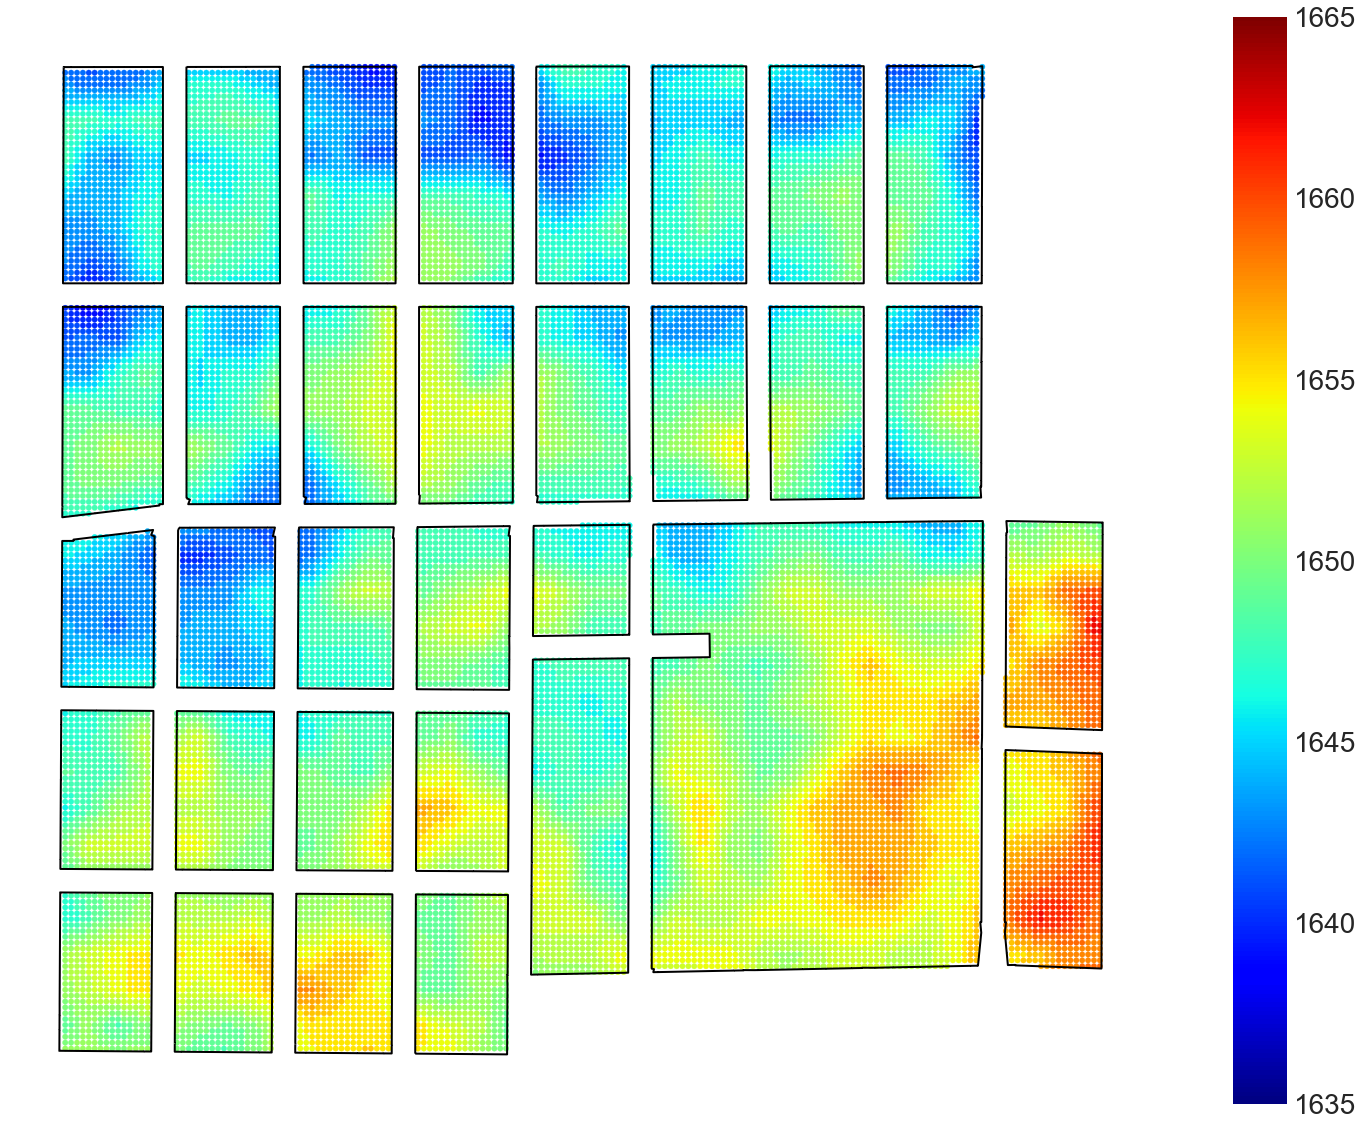

In [95]:
ax = urban_tile_grid_gdf_prj.plot(figsize=(28,20), column="ground_elevation", cmap='jet',legend = True, 
                               markersize = 30,vmin=1635, vmax=1665)

urban_tile_gdf_prj.plot(ax=ax, edgecolor='k',linewidth=2, facecolor = "None")

fig = ax.figure
cb_ax = fig.axes[1] 
cb_ax.tick_params(labelsize=28,)


ax.set_axis_off()


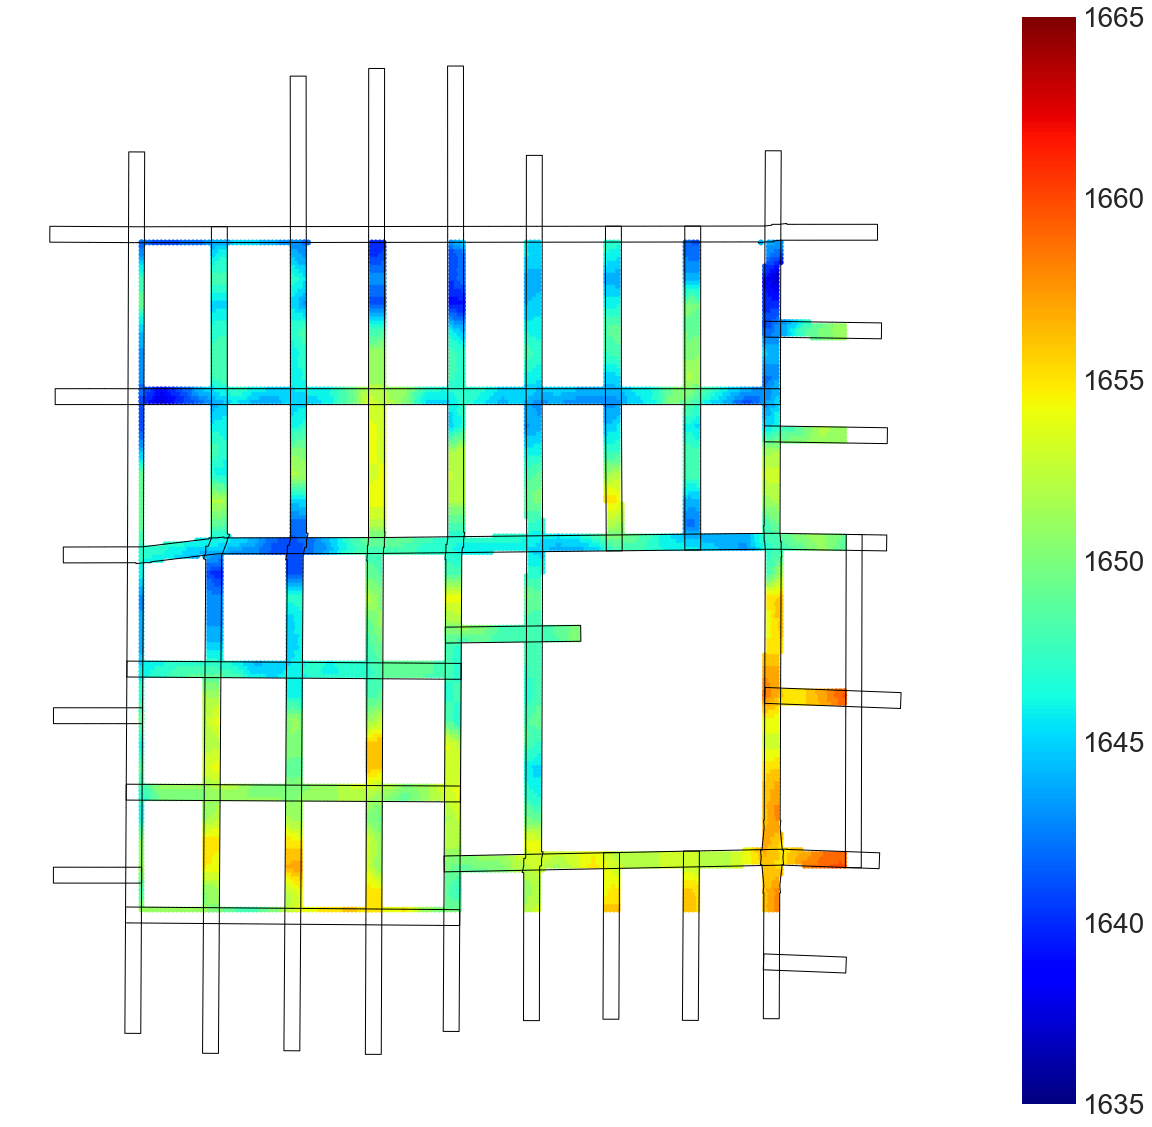

In [96]:
ax = street_grid_gdf_prj.plot(figsize=(28,20), column="ground_elevation", cmap='jet',legend = True,                                markersize = 30,vmin=1635, vmax=1665)

street_gdf_prj.plot(ax = ax, edgecolor='k',linewidth=1, facecolor = "None")


fig = ax.figure
cb_ax = fig.axes[1] 
cb_ax.tick_params(labelsize=28,)


ax.set_axis_off()

fig = ax.get_figure()
fig.savefig("3.5-10.png", dpi = 400)